## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dive_data = pd.merge(study_results, mouse_metadata,  how="left", on="Mouse ID")
dive_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice in the DataFrame.
len(dive_data ["Mouse ID"].unique())


249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = dive_data.loc[dive_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique
duplicate_mouse_id

<bound method Series.unique of 137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object>

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = dive_data.loc[dive_data["Mouse ID"] == "g989"]
duplicate_mouse_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = dive_data[dive_data['Mouse ID'].isin(duplicate_mouse_data)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
avg = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mid = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_stats = pd.DataFrame({"Mean Tumor Volume":avg,
                             "Meadian Tumor Volume":mid,
                             "Tumor Volume Variance":var,
                             "Tumor Volume Std. Dev.":sds,
                             "Tumor Volume Std. Err.":sem})
summary_stats 

,Mean Tumor Volume,Meadian Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#func_list =["mean", "median", "var", "std", "sem"]
# This method produces everything in a single groupby function.
summary_stats  = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

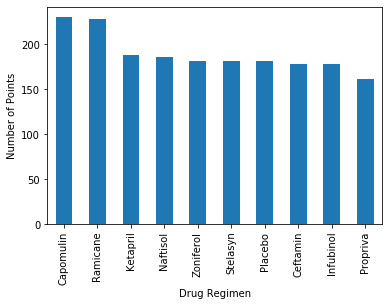

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
totals = clean_data['Drug Regimen'].value_counts()
totals.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Points")
plt.show()

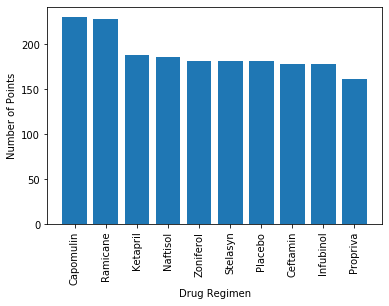

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
totals = clean_data['Drug Regimen'].value_counts()
plt.bar(totals.index.values,totals.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Points")
plt.show()

## Pie Plots

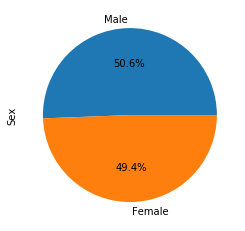

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
totals = clean_data.Sex.value_counts()
totals.plot(kind="pie",autopct='%1.1f%%')
plt.show()

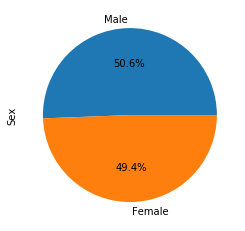

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
totals = clean_data.Sex.value_counts()
plt.pie(totals.values,labels=totals.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  

# Getting the last timepoint for each mouse

tumor_max = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
tumor_max = tumor_max.reset_index() 

#Merge the tumor max data with clean data to get the tumor volume 
data_combined = tumor_max.merge(clean_data,on=['Mouse ID','Timepoint'],how="left")
data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [30]:
# Treatments into a list 
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs_list:
    # Rows which contain mice on each drug and get the tumor volmes
    vol_tumor = data_combined.loc[data_combined["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_list.append(vol_tumor)
    
    #Outliers using upper and lower 
    quartiles = vol_tumor.quantile([.25,.5,.75])
    low_q = quartiles[0.25]
    upp_q =  quartiles[0.75]
    iqr =  upp_q-low_q
    low_bd =  low_q - (1.5*iqr)
    upp_bd = upp_q + (1.5*iqr)
    outliers = vol_tumor.loc[(vol_tumor < low_bd) | (vol_tumor > upp_bd)]
    print(f"{drug}'s possible outliers: {outliers}")

Capomulin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's possible outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


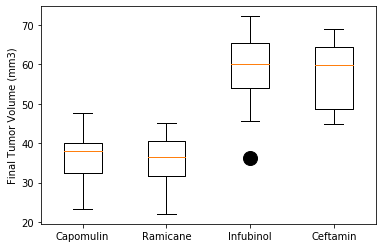

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
org = dict(markerfacecolor="black",markersize=14)
plt.boxplot(tumor_list, labels = drugs_list,flierprops=org)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

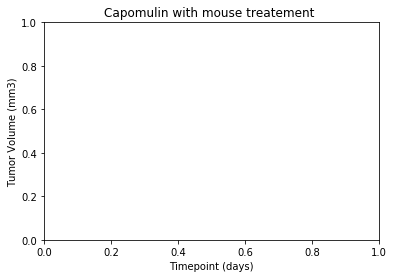

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin with mouse treatement ')
plt.show()


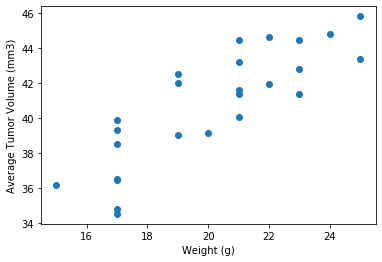

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
avg_capomulin = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse Weight and average tumor volume is 0.53


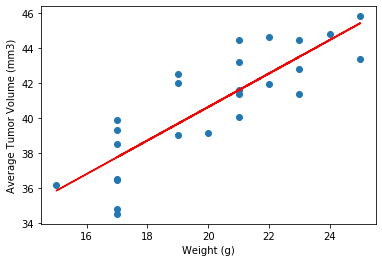

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse Weight and average tumor volume is {correlation}")
table = st.linregress(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Weight (g)']*table[0]+table[1]
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
plt.plot(x_values,y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse Weight and average tumor volume is 0.53


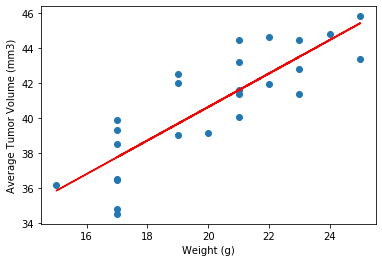

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse Weight and average tumor volume is {correlation}")
table = st.linregress(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Weight (g)']*table[0]+table[1]
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
plt.plot(x_values,y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse Weight and average tumor volume is 0.53


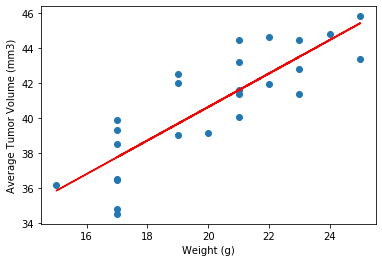

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse Weight and average tumor volume is {correlation}")
table = st.linregress(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Weight (g)']*table[0]+table[1]
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
plt.plot(x_values,y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()